<a href="https://colab.research.google.com/github/LeoPedrozo/MEIA/blob/main/OneMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Codigo original disponible en : https://github.com/aoaunam/introDEAP/blob/master/OneMax.ipynb



# Problema OneMax
El problema OneMax es una tarea de optimización simple que a menudo se usa como
el "Hello World" de los Framework de algoritmos genéticos. La tarea de OneMax es encontrar la cadena binaria de una longitud dada que maximiza la suma de sus dígitos. Por ejemplo, el problema OneMax de longitud 5 considerará candidatos como los siguientes:

11010 (suma de dígitos = 3), 00110 (suma de dígitos = 2), 11111 (suma de dígitos = 5)

## Módulos requeridos para nuestra evolución.
- **random** nos da una forma de generar bits aleatorios;
- **base** nos da acceso a Toolbox y base Fitness;
- **creator** nos permite crear nuestros tipos;
- **tools** nos da acceso al banco de operadores;
- **algorithms** nos permite algunos ciclos evolutivos genéricos.

In [ ]:
%pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 7.1 MB/s eta 0:00:00


In [ ]:
import random
from deap import base, creator, tools, algorithms

# Creación de tipos
El primer paso con DEAP es crear los tipos requeridos. Por lo general, los tipos creados son el fitness y el individuo. Para el problema de OneMax, queremos tener una solución con tantos **1s** como sea posible. Por lo tanto, necesitamos un estado físico que se **maximice** y un individuo que sea un contenedor ordenado, en forma de "list". La creación de tipos se realiza llamando a la función **create**. Esta función toma dos argumentos obligatorios y argumentos opcionales adicionales. El primer argumento es el nombre real del tipo que queremos crear. El segundo argumento es la clase base de la que debe heredar el nuevo tipo creado. Finalmente, los argumentos opcionales son miembros para agregar al nuevo tipo.

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

La primera línea pasa las propiedades de la base.Fitness a FitnessMax donde se maximizará la actitud, tomando como referencia el atributo de pesos (1.0,). La segunda línea crea una clase Individual que hereda las propiedades de lista y adquiere el atributo del tipo FitnessMax que se acaba de crear. Los pesos (así como el valor devuelto de la evaluación) son **siempre requeridos** para ser iterables. Podemos instanciar directamente objetos de la clase creada como sigue. Este paso no es necesario en un algoritmo, la instanciación se automatizará más adelante.

In [ ]:
ind = creator.Individual([1, 0, 1, 1, 0])

print(ind)
print(type(ind))
print(type(ind.fitness))

[1, 0, 1, 1, 0]
<class 'deap.creator.Individual'>
<class 'deap.creator.FitnessMax'>


# Toolbox
La caja de herramientas está destinada a almacenar funciones con sus argumentos bajo un alias estándar para usar en el algoritmo. Las funciones se registran mediante una llamada de función con dos argumentos obligatorios, el alias para dar a la función y la función con la que se asociará. Cualquier argumento adicional se dará como argumento cuando se llame al alias.

In [ ]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

En el último bloque de código creamos el objeto **toolbox** y registramos tres funciones: Primero, **attr_bool**, que llama a randint desde el módulo aleatorio con argumentos **(0, 1)** para crear un entero en el intervalo
. La segunda función, **individualCreator**, cuando se llame, usará la función initRepeat disponible en el módulo de herramientas para llenar una clase Individual con lo que se produce mediante 10 llamadas a la función attr_bool previamente definida. Lo mismo se hace para la función populationCreator. Por ejemplo, llamar a cada función individualmente muestra cómo procede.

In [ ]:
bit = toolbox.attr_bool()
ind = toolbox.individualCreator()
pop = toolbox.populationCreator(n=3)

print("bit es de tipo %s y tiene valor\n%s" % (type(bit), bit))
print("ind es de tipo %s y contiene %d bits\n%s" % (type(ind), len(ind), ind))
print("pop es de tipo %s y contiene %d individuos\n%s" % (type(pop), len(pop), pop))

bit es de tipo <class 'int'> y tiene valor
1
ind es de tipo <class 'deap.creator.Individual'> y contiene 10 bits
[0, 1, 1, 0, 0, 0, 1, 1, 1, 0]
pop es de tipo <class 'list'> y contiene 3 individuos
[[1, 0, 1, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]]


# Evaluación de la Función
La función de evaluación es bastante simple para el problema OneMax, necesitamos contar el número de unos en un individuo. Recordamos aquí que el valor devuelto debe ser un iterable de longitud igual al número de objetivos (pesos).

In [ ]:
def evalOneMax(individualCreator):
    return sum(individualCreator),

# Operadores Genéticos
El registro de los operadores y sus argumentos predeterminados en la caja de herramientas se realiza de la siguiente manera.

In [ ]:
toolbox.register("evaluate", evalOneMax)

# Single-point crossover:
toolbox.register("mate", tools.cxTwoPoint)

# Mutación Flip-bit:
# indpb: Probabilidad independiente de que cada atributo sea invertido
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)

# Selección de torneo con tamaño de torneo de 3:
toolbox.register("select", tools.selTournament, tournsize=3)

La evaluación recibe el alias **evaluate**. Teniendo un solo argumento siendo el individuo a evaluar, no necesitamos corregir ninguno, el individuo se dará más adelante en el algoritmo. La función de cruce de dos puntos se registra de la misma manera bajo el alias **mate**. La mutación, por su parte, necesita un argumento para ser fijado (la probabilidad independiente de que cada atributo sea mutado **indpb**). En los algoritmos, la función **mutate()** se llama con la firma **toolbox.mutate(mutant)**. Esta es la forma más conveniente porque cada mutación toma una cantidad diferente de argumentos, tener esos argumentos fijos en la caja de herramientas deja abiertas la mayoría de las posibilidades para cambiar el operador de mutación (cruce, selección o evaluación) más adelante en sus investigaciones. Finalmente, el operador de selección se registra con el nombre **select** y el tamaño del torneo se establece en 3. Con esto, podemos mutar a un individuo y esperar que se invierta el 10% de sus atributos.

In [ ]:
ind = toolbox.individualCreator()
print(ind)
toolbox.mutate(ind)
print(ind)

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 1, 1, 1, 0]


Los operadores ejecutan su comportamiento sobre los individuos en el lugar, lo que significa que si el individuo no se copia antes de modificarse, el antiguo individuo se pierde. La copia de un individuo se realiza con la función **clone** disponible en cada caja de herramientas.

In [ ]:
mutant = toolbox.clone(ind)
print(mutant is ind)
print(mutant == ind)

False
True


# Evolución de la población
El programa principal es muy simple. Consiste en generar una población, y dársela al algoritmo para que evolucione una solución. Aquí emplearemos algunas herramientas de introspección útiles, como las estadísticas y el Salón de la fama (**HallOfFame**). Las estadísticas se calculan utilizando funciones "numpy" sobre la población, y el salón de la fama realiza un seguimiento de los mejores individuos que han aparecido durante la evolución. El algoritmo toma como argumentos, entre otros, la población y la caja de herramientas. Una vez finalizada la evolución la población contiene los individuos de la última generación.

In [ ]:
def main():
    import numpy

    pop = toolbox.populationCreator(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)

    return pop, logbook, hof

A continuación, protegemos nuestra llamada a la función principal y lanzamos la evolución, el argumento detallado indica que se generan las estadísticas en cada generación. Podemos imprimir y trazar los datos devueltos.

gen	nevals	avg 	min	max
0  	50    	5.16	2  	9  
1  	33    	6.32	4  	9  
2  	35    	6.98	3  	9  
3  	25    	7.5 	4  	10 
4  	30    	8.14	6  	10 
5  	28    	8.66	7  	10 
6  	28    	9.18	6  	10 
7  	32    	9.52	8  	10 
8  	27    	9.82	8  	10 
9  	27    	9.72	7  	10 
10 	31    	9.86	7  	10 
El mejor individuo es: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
con rendimiento-fitness: (10.0,)


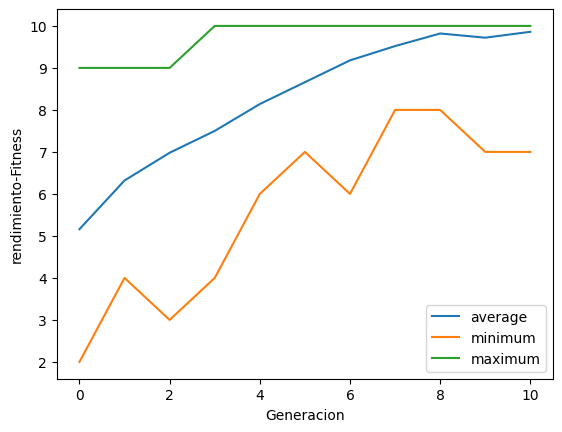

In [ ]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("El mejor individuo es: %s\ncon rendimiento-fitness: %s" % (hof[0], hof[0].fitness))

    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generacion")
    plt.ylabel("rendimiento-Fitness")
    plt.legend(loc="lower right")
    plt.show()